# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 4</font>

## Exercícios 

Hora de praticar um pouco. Resolva as questões a seguir e consulte a documentação Python se necessário! 

A solução será apresentada no próximo capítulo.

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

file_path = "D:/FCDados/[02] - Big_Data_Real_Time_Analytics_com_Python_Spark/[04] - Analise_Exploratoria_Dados/[01] - InputData/"

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.8.0
numpy     : 1.25.0
pandas    : 2.0.2



In [4]:
# O dataset contém registros de corridas de táxi
df = pd.read_csv(file_path + 'dataframe.csv', parse_dates = ['Data'], usecols = list(range(0,6)))

In [5]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [6]:
df.sort_index(inplace = True)
df.sample(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
51,2015-10-25,2.00,NaN,NaN,NaN,NaN
70,2015-12-15,6.50,0:58:43,3523.0,58.716667,9.033333
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
36,2015-09-17,1.50,0:11:06,666.0,11.100000,7.400000
10,2015-08-13,2.35,0:17:25,1045.0,17.416667,7.411348
56,2015-11-07,5.63,0:49:05,2945.0,49.083333,8.718176
15,2015-08-17,1.34,NaN,NaN,NaN,NaN
32,2015-09-08,3.05,0:23:11,1391.0,23.183333,7.601093
63,2015-11-23,3.05,0:22:35,1355.0,22.583333,7.404372
54,2015-11-03,5.30,0:39:26,2366.0,39.433333,7.440252


In [7]:
# Exercício 1 - Qual o valor máximo da coluna Minutos?
df.describe()

,Data,Distancia,Segundos,Minutos,Min_Por_Km
count,81,81.000000,52.000000,52.000000,52.000000
mean,2015-10-05 08:00:00,3.137531,1901.788462,31.696474,7.725297
min,2015-08-02 00:00:00,0.650000,376.000000,6.266667,6.000000
25%,2015-08-21 00:00:00,1.370000,583.750000,9.729167,7.020479
50%,2015-09-28 00:00:00,2.100000,1343.500000,22.391667,7.533333
75%,2015-11-10 00:00:00,3.050000,1743.250000,29.054167,8.480023
max,2016-01-01 00:00:00,26.200000,15643.000000,260.716667,10.000000
std,NaN,3.634519,2560.424171,42.673736,0.954475


In [8]:
# Exercício 2 - Qual o valor mínimo de distância acima de 2.0?
df.Distancia.fillna(0, inplace = True) 
df = df.loc[df.Distancia > 2.0]
df.Distancia.min()

2.01

(array([ 8., 27., 30., 33., 37., 38., 38., 38., 38., 38., 38., 38., 39.,
        39., 39., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41., 41.,
        41., 41., 41., 42.]),
 array([ 2.01      ,  2.81633333,  3.62266667,  4.429     ,  5.23533333,
         6.04166667,  6.848     ,  7.65433333,  8.46066667,  9.267     ,
        10.07333333, 10.87966667, 11.686     , 12.49233333, 13.29866667,
        14.105     , 14.91133333, 15.71766667, 16.524     , 17.33033333,
        18.13666667, 18.943     , 19.74933333, 20.55566667, 21.362     ,
        22.16833333, 22.97466667, 23.781     , 24.58733333, 25.39366667,
        26.2       ]),
 <BarContainer object of 30 artists>)

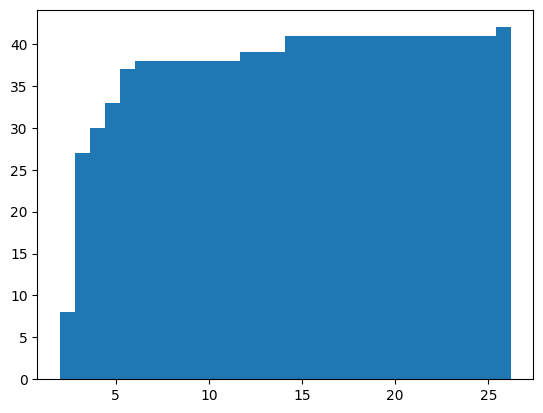

In [16]:
# Exercício 3 - Crie um plot com a frequência acumulada da coluna Distancia.
plt.hist(df.Distancia, bins = 30, cumulative = True)

In [10]:
# Exercício 4 - Qual o dia da semana no índice de posição zero?
#%pip install datetime
from datetime import datetime

df.Data.iloc[0].strftime('%A')

'Tuesday'

In [11]:
# Exercício 6 - Extraia todos os dias da semana (em formato texto) e insira em uma nova coluna no dataframe df.
df["DiaSemana"] = df['Data'].dt.day_name()
df["DiaSemanaNum"] = df['Data'].dt.day_of_week
df

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km,DiaSemana,DiaSemanaNum
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday,1
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday,3
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday,4
5,2015-08-08,3.40,NaN,NaN,NaN,NaN,Saturday,5
6,2015-08-09,2.50,NaN,NaN,NaN,NaN,Sunday,6
7,2015-08-10,3.36,0:28:37,1717.0,28.616667,8.516865,Monday,0
10,2015-08-13,2.35,0:17:25,1045.0,17.416667,7.411348,Thursday,3
23,2015-08-24,3.00,NaN,NaN,NaN,NaN,Monday,0
27,2015-08-27,2.50,0:25:00,1500.0,25.000000,10.000000,Thursday,3
28,2015-08-29,5.00,0:43:27,2607.0,43.450000,8.690000,Saturday,5


<BarContainer object of 7 artists>

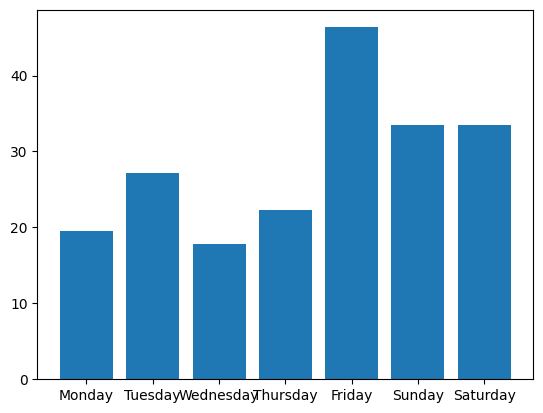

In [12]:
# Exercício 7 - Crie um gráfico de barras com o total da distância percorrida em cada dia da semana.
df_agrupado = df.groupby("DiaSemana").sum("Distancia").reset_index().sort_values("DiaSemanaNum")
plt.bar(df_agrupado['DiaSemana'], df_agrupado['Distancia'])

In [13]:
# Exercício 8 - Delete a coluna Tempo do dataframe df.
del df['Tempo']

<BarContainer object of 7 artists>

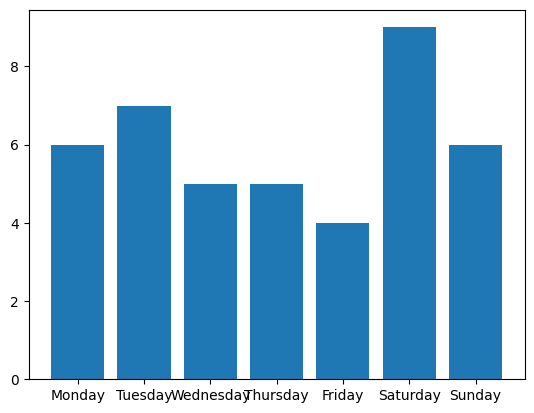

In [14]:
# Exercício 9 - Qual o total de corridas de taxi por dia da semana?
df_agrupado_2 = df.groupby(['DiaSemana','DiaSemanaNum'])['Data'].agg('count').reset_index().sort_values("DiaSemanaNum")
plt.bar(df_agrupado_2["DiaSemana"], df_agrupado_2["Data"])

In [15]:
# Exercício 10 - Qual a média para cada uma das colunas por dia da semana?
df_agrupado_3 = df.groupby(['DiaSemana']).agg('mean').reset_index().sort_values("DiaSemanaNum")
df_agrupado_3

,DiaSemana,Data,Distancia,Segundos,Minutos,Min_Por_Km,DiaSemanaNum
1,Monday,2015-10-01 12:00:00,3.256667,1521.40,25.356667,7.656305,0.0
5,Tuesday,2015-10-22 00:00:00,3.871429,2055.00,34.250000,8.058546,1.0
6,Wednesday,2015-11-22 04:48:00,3.562000,1728.00,28.800000,7.906038,2.0
4,Thursday,2015-10-05 04:48:00,4.456000,2498.25,41.637500,8.475446,3.0
0,Friday,2015-10-24 18:00:00,11.587500,12021.50,200.358333,9.705239,4.0
2,Saturday,2015-10-18 13:20:00,3.715556,1996.60,33.276667,8.296495,5.0
3,Sunday,2015-10-30 20:00:00,5.586667,3247.00,54.116667,8.533065,6.0


## FIM